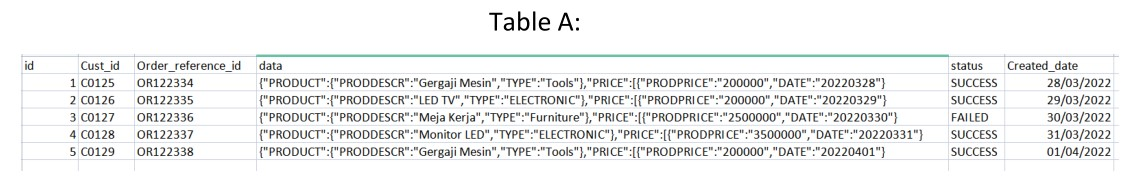

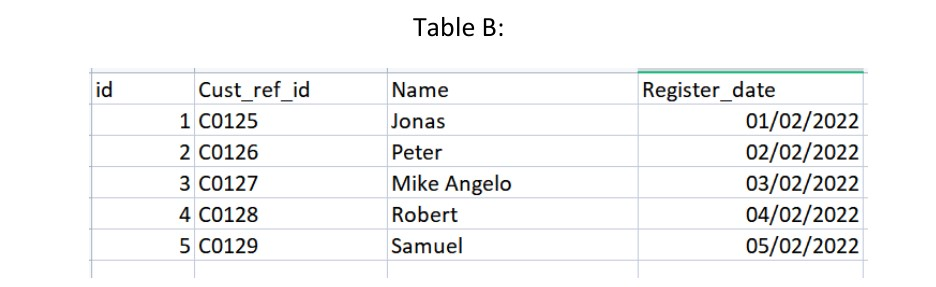

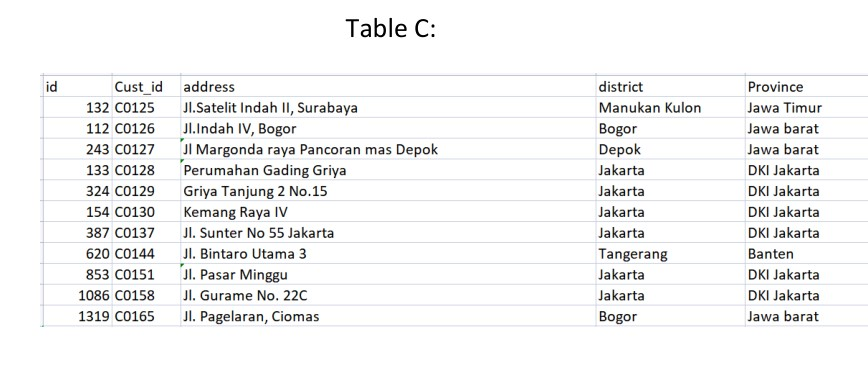

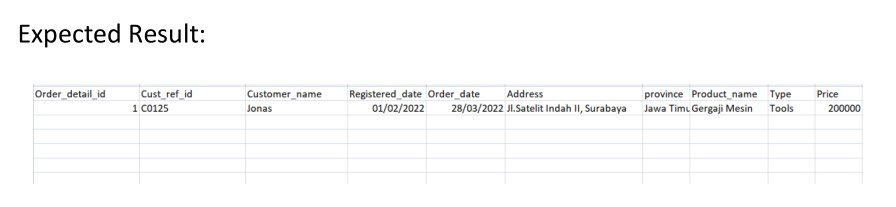

Dengan kondisi sumber data diatas, apakah memungkin untuk memproses data dengan hasil tersebut ? Jika
memungkinkan, Buatlah Proses ETL sederhana dari data source dengan hasil yang sudah ditentukan dan dengan kondisi
hanya data yang ber-status Sukses. Kemudian harap screen record sambil menjelaskan dan menjalankan ETL proses yang
sudah di buat atau buat penjelasan secara rinci proses nya seperti apa dan disertai screenshot/capture nya (boleh
menggunakan tools apapun).

In [ ]:
import pandas as pd
import json

In [ ]:
a = pd.read_csv('a.csv', converters={'data': json.loads}, header=0)
a

,id,cust_id,order_referece_id,data,status,created_date
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022
2,3,C0127,OR122336,"{'PRODUCT': {'PRODDESCR': 'Meja Kerja', 'TYPE'...",FAILED,30/03/2022
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022


In [ ]:
a_dataKeys = list(a['data'][0].keys())
a[a_dataKeys] = a['data'].apply(pd.Series)
a

,id,cust_id,order_referece_id,data,status,created_date,PRODUCT,PRICE
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220328'}"
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022,"{'PRODDESCR': 'LED TV', 'TYPE': 'ELECTRONIC'}","{'PRODPRICE': '200000', 'DATE': '20220329'}"
2,3,C0127,OR122336,"{'PRODUCT': {'PRODDESCR': 'Meja Kerja', 'TYPE'...",FAILED,30/03/2022,"{'PRODDESCR': 'Meja Kerja', 'TYPE': 'Furniture'}","{'PRODPRICE': '250000', 'DATE': '20220330'}"
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022,"{'PRODDESCR': 'Monitor LED', 'TYPE': 'ELECTRON...","{'PRODPRICE': '350000', 'DATE': '20220331'}"
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220401'}"


In [ ]:
for i in a_dataKeys:
  a[list(a[i][0].keys())] = a[i].apply(pd.Series)

a

,id,cust_id,order_referece_id,data,status,created_date,PRODUCT,PRICE,PRODDESCR,TYPE,PRODPRICE,DATE
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220328'}",Gergaji Mesin,Tools,200000,20220328
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022,"{'PRODDESCR': 'LED TV', 'TYPE': 'ELECTRONIC'}","{'PRODPRICE': '200000', 'DATE': '20220329'}",LED TV,ELECTRONIC,200000,20220329
2,3,C0127,OR122336,"{'PRODUCT': {'PRODDESCR': 'Meja Kerja', 'TYPE'...",FAILED,30/03/2022,"{'PRODDESCR': 'Meja Kerja', 'TYPE': 'Furniture'}","{'PRODPRICE': '250000', 'DATE': '20220330'}",Meja Kerja,Furniture,250000,20220330
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022,"{'PRODDESCR': 'Monitor LED', 'TYPE': 'ELECTRON...","{'PRODPRICE': '350000', 'DATE': '20220331'}",Monitor LED,ELECTRONIC,350000,20220331
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220401'}",Gergaji Mesin,Tools,200000,20220401


In [ ]:
b = pd.read_csv('b.csv')
b['cust_id'] = b['cust_ref_id']
b

,id,cust_ref_id,name,register_date,cust_id
0,1,C0125,Jonas,01/02/2022,C0125
1,2,C0126,Peter,02/02/2022,C0126
2,3,C0127,Mike Angelo,03/02/2022,C0127
3,4,C0128,Robert,04/02/2022,C0128
4,5,C0129,Samuel,05/02/2022,C0129


In [ ]:
c = pd.read_csv('c.csv')
c

,id,cust_id,address,district,province
0,132,C0125,Jl.Satelit Indah II Surabaya,Manukan Kulon,Jawa Timur
1,112,C0126,Ji.Indah IV Bogor,Bogor,Jawa barat
2,243,C0127,Jl Margonda raya Pancoran mas Depok,Depok,Jawa barat
3,133,C0128,Perumahan Gading Griya,Jakarta,DKI Jakarta
4,324,C0129,Griya Tanjung 2 No.15,Jakarta,DKI Jakarta
5,154,C0130,Kemang Raya IV,Jakarta,DKI Jakarta
6,387,C0137,JI. Sunter No 55 Jakarta,Jakarta,DKI Jakarta
7,620,C0144,JI. Bintaro Utama 3,Tangerang,Banten
8,953,C0151,II Pasar Minggu,Jakarta,DKI Jakarta
9,1086,C0158,Jl. Gurame No. 22C,Jakarta,DKI Jakarta


In [ ]:
merge_df = pd.merge(a, b, on='cust_id')
merge_df

,id_x,cust_id,order_referece_id,data,status,created_date,PRODUCT,PRICE,PRODDESCR,TYPE,PRODPRICE,DATE,id_y,cust_ref_id,name,register_date
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220328'}",Gergaji Mesin,Tools,200000,20220328,1,C0125,Jonas,01/02/2022
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022,"{'PRODDESCR': 'LED TV', 'TYPE': 'ELECTRONIC'}","{'PRODPRICE': '200000', 'DATE': '20220329'}",LED TV,ELECTRONIC,200000,20220329,2,C0126,Peter,02/02/2022
2,3,C0127,OR122336,"{'PRODUCT': {'PRODDESCR': 'Meja Kerja', 'TYPE'...",FAILED,30/03/2022,"{'PRODDESCR': 'Meja Kerja', 'TYPE': 'Furniture'}","{'PRODPRICE': '250000', 'DATE': '20220330'}",Meja Kerja,Furniture,250000,20220330,3,C0127,Mike Angelo,03/02/2022
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022,"{'PRODDESCR': 'Monitor LED', 'TYPE': 'ELECTRON...","{'PRODPRICE': '350000', 'DATE': '20220331'}",Monitor LED,ELECTRONIC,350000,20220331,4,C0128,Robert,04/02/2022
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220401'}",Gergaji Mesin,Tools,200000,20220401,5,C0129,Samuel,05/02/2022


In [ ]:
df = pd.merge(merge_df, c, on='cust_id')
df

,id_x,cust_id,order_referece_id,data,status,created_date,PRODUCT,PRICE,PRODDESCR,TYPE,PRODPRICE,DATE,id_y,cust_ref_id,name,register_date,id,address,district,province
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220328'}",Gergaji Mesin,Tools,200000,20220328,1,C0125,Jonas,01/02/2022,132,Jl.Satelit Indah II Surabaya,Manukan Kulon,Jawa Timur
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022,"{'PRODDESCR': 'LED TV', 'TYPE': 'ELECTRONIC'}","{'PRODPRICE': '200000', 'DATE': '20220329'}",LED TV,ELECTRONIC,200000,20220329,2,C0126,Peter,02/02/2022,112,Ji.Indah IV Bogor,Bogor,Jawa barat
2,3,C0127,OR122336,"{'PRODUCT': {'PRODDESCR': 'Meja Kerja', 'TYPE'...",FAILED,30/03/2022,"{'PRODDESCR': 'Meja Kerja', 'TYPE': 'Furniture'}","{'PRODPRICE': '250000', 'DATE': '20220330'}",Meja Kerja,Furniture,250000,20220330,3,C0127,Mike Angelo,03/02/2022,243,Jl Margonda raya Pancoran mas Depok,Depok,Jawa barat
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022,"{'PRODDESCR': 'Monitor LED', 'TYPE': 'ELECTRON...","{'PRODPRICE': '350000', 'DATE': '20220331'}",Monitor LED,ELECTRONIC,350000,20220331,4,C0128,Robert,04/02/2022,133,Perumahan Gading Griya,Jakarta,DKI Jakarta
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220401'}",Gergaji Mesin,Tools,200000,20220401,5,C0129,Samuel,05/02/2022,324,Griya Tanjung 2 No.15,Jakarta,DKI Jakarta


In [ ]:
df1 = df.loc[(df['status'] == "SUCCESS")]
df1

,id_x,cust_id,order_referece_id,data,status,created_date,PRODUCT,PRICE,PRODDESCR,TYPE,PRODPRICE,DATE,id_y,cust_ref_id,name,register_date,id,address,district,province
0,1,C0125,OR122334,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,28/03/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220328'}",Gergaji Mesin,Tools,200000,20220328,1,C0125,Jonas,01/02/2022,132,Jl.Satelit Indah II Surabaya,Manukan Kulon,Jawa Timur
1,2,C0126,OR122335,"{'PRODUCT': {'PRODDESCR': 'LED TV', 'TYPE': 'E...",SUCCESS,29/03/2022,"{'PRODDESCR': 'LED TV', 'TYPE': 'ELECTRONIC'}","{'PRODPRICE': '200000', 'DATE': '20220329'}",LED TV,ELECTRONIC,200000,20220329,2,C0126,Peter,02/02/2022,112,Ji.Indah IV Bogor,Bogor,Jawa barat
3,4,C0128,OR122337,"{'PRODUCT': {'PRODDESCR': 'Monitor LED', 'TYPE...",SUCCESS,31/03/2022,"{'PRODDESCR': 'Monitor LED', 'TYPE': 'ELECTRON...","{'PRODPRICE': '350000', 'DATE': '20220331'}",Monitor LED,ELECTRONIC,350000,20220331,4,C0128,Robert,04/02/2022,133,Perumahan Gading Griya,Jakarta,DKI Jakarta
4,5,C0129,OR122338,"{'PRODUCT': {'PRODDESCR': 'Gergaji Mesin', 'TY...",SUCCESS,01/04/2022,"{'PRODDESCR': 'Gergaji Mesin', 'TYPE': 'Tools'}","{'PRODPRICE': '200000', 'DATE': '20220401'}",Gergaji Mesin,Tools,200000,20220401,5,C0129,Samuel,05/02/2022,324,Griya Tanjung 2 No.15,Jakarta,DKI Jakarta


In [ ]:
fixedDf = pd.DataFrame()
fixedDf['order_detail_id'] = df1['id_x']
fixedDf['cust_ref_id'] = df1['cust_id']
fixedDf['customer_name'] = df1['name']
fixedDf['registered_date'] = pd.to_datetime(df1['register_date'], format="%d/%m/%Y")
fixedDf['order_date'] = pd.to_datetime(df1['created_date'], format="%d/%m/%Y")
fixedDf['address'] = df1['address']
fixedDf['province'] = df1['province']
fixedDf['product_name'] = df1['PRODDESCR']
fixedDf['type'] = df1['TYPE']
fixedDf['price'] = df1['PRODPRICE'].astype(int)

fixedDf

,order_detail_id,cust_ref_id,customer_name,registered_date,order_date,address,province,product_name,type,price
0,1,C0125,Jonas,2022-02-01,2022-03-28,Jl.Satelit Indah II Surabaya,Jawa Timur,Gergaji Mesin,Tools,200000
1,2,C0126,Peter,2022-02-02,2022-03-29,Ji.Indah IV Bogor,Jawa barat,LED TV,ELECTRONIC,200000
3,4,C0128,Robert,2022-02-04,2022-03-31,Perumahan Gading Griya,DKI Jakarta,Monitor LED,ELECTRONIC,350000
4,5,C0129,Samuel,2022-02-05,2022-04-01,Griya Tanjung 2 No.15,DKI Jakarta,Gergaji Mesin,Tools,200000


In [ ]:
fixedDf.to_csv('result.csv', index=False)

In [ ]:
result = pd.read_csv('result.csv')
result

,order_detail_id,cust_ref_id,customer_name,registered_date,order_date,address,province,product_name,type,price
0,1,C0125,Jonas,2022-02-01,2022-03-28,Jl.Satelit Indah II Surabaya,Jawa Timur,Gergaji Mesin,Tools,200000
1,2,C0126,Peter,2022-02-02,2022-03-29,Ji.Indah IV Bogor,Jawa barat,LED TV,ELECTRONIC,200000
2,4,C0128,Robert,2022-02-04,2022-03-31,Perumahan Gading Griya,DKI Jakarta,Monitor LED,ELECTRONIC,350000
3,5,C0129,Samuel,2022-02-05,2022-04-01,Griya Tanjung 2 No.15,DKI Jakarta,Gergaji Mesin,Tools,200000


In [ ]:
import sqlite3

conn = sqlite3.connect('sqlite.db')
cur = conn.cursor()

In [ ]:
fixedDf.to_sql(name='order', if_exists='replace', con=conn, index=False)

In [ ]:
cur.execute("""SELECT * FROM `order`;""").fetchall()

[(1,
  'C0125',
  'Jonas',
  '2022-02-01 00:00:00',
  '2022-03-28 00:00:00',
  'Jl.Satelit Indah II Surabaya',
  'Jawa Timur',
  'Gergaji Mesin',
  'Tools',
  200000),
 (2,
  'C0126',
  'Peter',
  '2022-02-02 00:00:00',
  '2022-03-29 00:00:00',
  'Ji.Indah IV Bogor',
  'Jawa barat',
  'LED TV',
  'ELECTRONIC',
  200000),
 (4,
  'C0128',
  'Robert',
  '2022-02-04 00:00:00',
  '2022-03-31 00:00:00',
  'Perumahan Gading Griya',
  'DKI Jakarta',
  'Monitor LED',
  'ELECTRONIC',
  350000),
 (5,
  'C0129',
  'Samuel',
  '2022-02-05 00:00:00',
  '2022-04-01 00:00:00',
  'Griya Tanjung 2 No.15',
  'DKI Jakarta',
  'Gergaji Mesin',
  'Tools',
  200000)]